In [1]:
##### Import necessary labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### Load the dataset
crimes_df = pd.read_csv('crimes_against_women_2001-2014.csv')

In [3]:
#### Set to display all columns
pd.set_option('display.max_row', None)

In [4]:
### Reading the csv file
crimes_df

Unnamed: 0           STATE/UT                  DISTRICT  Year  Rape  \
0               0     ANDHRA PRADESH                  ADILABAD  2001    50   
1               1     ANDHRA PRADESH                 ANANTAPUR  2001    23   
2               2     ANDHRA PRADESH                  CHITTOOR  2001    27   
3               3     ANDHRA PRADESH                  CUDDAPAH  2001    20   
4               4     ANDHRA PRADESH             EAST GODAVARI  2001    23   
5               5     ANDHRA PRADESH             GUNTAKAL RLY.  2001     0   
6               6     ANDHRA PRADESH                    GUNTUR  2001    54   
7               7     ANDHRA PRADESH            HYDERABAD CITY  2001    37   
8               8     ANDHRA PRADESH                KARIMNAGAR  2001    56   
9               9     ANDHRA PRADESH                   KHAMMAM  2001    47   
10             10     ANDHRA PRADESH                   KRISHNA  2001    37   
11             11     ANDHRA PRADESH                   KURNOOL  2001    29   
12             12     ANDHRA PRADESH             MAHABOOBNAGAR  2001    59   
13             13     ANDHRA PRADESH                     MEDAK  2001    35   
14             14     ANDHRA PRADESH                  NALGONDA  2001    35   
15             15     ANDHRA PRADESH                   NELLORE  2001    46   
16             16     ANDHRA PRADESH                 NIZAMABAD  2001    21   
17             17     ANDHRA PRADESH                 PRAKASHAM  2001    19   
18             18     ANDHRA PRADESH               RANGA REDDY  2001    72   
19             19     ANDHRA PRADESH         SECUNDERABAD RLY.  2001     0   
20             20     ANDHRA PRADESH                SRIKAKULAM  2001     8   
21             21     ANDHRA PRADESH                VIJAYAWADA  2001    25   
22             22     ANDHRA PRADESH           VIJAYAWADA RLY.  2001     1   
23             23     ANDHRA PRADESH             VISAKHA RURAL  2001    12   
24             24     ANDHRA PRADESH             VISAKHAPATNAM  2001    13   
25             25     ANDHRA PRADESH              VIZIANAGARAM  2001     8   
26             26     ANDHRA PRADESH                  WARANGAL  2001    53   
27             27     ANDHRA PRADESH             WEST GODAVARI  2001    61   
28             28     ANDHRA PRADESH                     TOTAL  2001   871   
29             29  ARUNACHAL PRADESH                 CHANGLANG  2001     1   
30             30  ARUNACHAL PRADESH             DIBANG VALLEY  2001     2   
31             31  ARUNACHAL PRADESH               KAMENG EAST  2001     2   
32             32  ARUNACHAL PRADESH               KAMENG WEST  2001     0   
33             33  ARUNACHAL PRADESH                     LOHIT  2001     2   
34             34  ARUNACHAL PRADESH                PAPUM PARE  2001     9   
35             35  ARUNACHAL PRADESH                SIANG EAST  2001     5   
36             36  ARUNACHAL PRADESH               SIANG UPPER  2001     2   
37             37  ARUNACHAL PRADESH                SIANG WEST  2001     4   
38             38  ARUNACHAL PRADESH           SUBANSIRI LOWER  2001     2   
39             39  ARUNACHAL PRADESH           SUBANSIRI UPPER  2001     2   
40             40  ARUNACHAL PRADESH                    TAWANG  2001     1   
41             41  ARUNACHAL PRADESH                     TIRAP  2001     1   
42             42  ARUNACHAL PRADESH                     TOTAL  2001    33   
43             43              ASSAM                   BARPETA  2001    28   
44             44              ASSAM                BONGAIGAON  2001    20   
45             45              ASSAM                    C.I.D.  2001     0   
46             46              ASSAM                    CACHAR  2001    45   
47             47              ASSAM                   DARRANG  2001    48   
48             48              ASSAM                   DHEMAJI  2001    42   
49             49              ASSAM                    DHUBRI  2001    43   
50             50            

In [5]:
#### checking columns names
crimes_df.columns

Index(['Unnamed: 0', 'STATE/UT', 'DISTRICT', 'Year', 'Rape',
       'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [6]:
#### checking rows
crimes_df.index

RangeIndex(start=0, stop=10677, step=1)

In [7]:
##### Find out the shape our dataset
crimes_df.shape

(10677, 11)

#### Data Preprocessing And Cleaning

In [8]:
#### Checking the null or missing values
overall_crime = crimes_df.isna().sum()
overall_crime

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

##### Unique districts where crimes has been commited

In [9]:
districts = len(crimes_df.DISTRICT.unique())
districts

1605

##### But there are 718 districts in India, in total, which means there is messy or false datas in a huge amount, in this case, we better drop the column "District" and also "Unnamed: 0", as it is of no use, in our data analysis process.

In [10]:
crimes_df.drop(['DISTRICT', 'Unnamed: 0'], axis = 1, inplace=True)

In [11]:
##### Rename columns with shorter names
crimes_df.rename( columns = {'Kidnapping and Abduction':'Kidnapping_Abduction','Dowry Deaths':'Dowry_Deaths',
                             'Assault on women with intent to outrage her modesty':'Hurting_of_womens_modesty',
                             'Insult to modesty of Women':'Insult_to_womens_modesty',
                             'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                             'Importation of Girls':'Importation_of_Girls'}, inplace = True)

In [12]:
#### Set to display all columns
pd.set_option('display.max_row', None)

In [13]:
#### Check the new dataset with new names
crimes_df.head(100)

STATE/UT  Year  Rape  Kidnapping_Abduction  Dowry_Deaths  \
0      ANDHRA PRADESH  2001    50                    30            16   
1      ANDHRA PRADESH  2001    23                    30             7   
2      ANDHRA PRADESH  2001    27                    34            14   
3      ANDHRA PRADESH  2001    20                    20            17   
4      ANDHRA PRADESH  2001    23                    26            12   
5      ANDHRA PRADESH  2001     0                     0             0   
6      ANDHRA PRADESH  2001    54                    51             7   
7      ANDHRA PRADESH  2001    37                    39            24   
8      ANDHRA PRADESH  2001    56                    49            62   
9      ANDHRA PRADESH  2001    47                    30            17   
10     ANDHRA PRADESH  2001    37                    21            10   
11     ANDHRA PRADESH  2001    29                    47            13   
12     ANDHRA PRADESH  2001    59                    27            14   
13     ANDHRA PRADESH  2001    35                    20            26   
14     ANDHRA PRADESH  2001    35                    19            31   
15     ANDHRA PRADESH  2001    46                    80            10   
16     ANDHRA PRADESH  2001    21                    21            19   
17     ANDHRA PRADESH  2001    19                    12             5   
18     ANDHRA PRADESH  2001    72                    83            37   
19     ANDHRA PRADESH  2001     0                     0             1   
20     ANDHRA PRADESH  2001     8                    12             6   
21     ANDHRA PRADESH  2001    25                    48             2   
22     ANDHRA PRADESH  2001     1                     0             0   
23     ANDHRA PRADESH  2001    12                    12             3   
24     ANDHRA PRADESH  2001    13                     6             0   
25     ANDHRA PRADESH  2001     8                     2             0   
26     ANDHRA PRADESH  2001    53                    25            52   
27     ANDHRA PRADESH  2001    61                    21            15   
28     ANDHRA PRADESH  2001   871                   765           420   
29  ARUNACHAL PRADESH  2001     1                     2             0   
30  ARUNACHAL PRADESH  2001     2                     4             0   
31  ARUNACHAL PRADESH  2001     2                     5             0   
32  ARUNACHAL PRADESH  2001     0                     2             0   
33  ARUNACHAL PRADESH  2001     2                     6             0   
34  ARUNACHAL PRADESH  2001     9                     5             0   
35  ARUNACHAL PRADESH  2001     5                     7             0   
36  ARUNACHAL PRADESH  2001     2                     5             0   
37  ARUNACHAL PRADESH  2001     4                    10             0   
38  ARUNACHAL PRADESH  2001     2                     5             0   
39  ARUNACHAL PRADESH  2001     2                     1             0   
40  ARUNACHAL PRADESH  2001     1                     0             0   
41  ARUNACHAL PRADESH  2001     1                     3             0   
42  ARUNACHAL PRADESH  2001    33                    55             0   
43              ASSAM  2001    28                    88            10   
44              ASSAM  2001    20                    21             1   
45              ASSAM  2001     0                     0             0   
46              ASSAM  2001    45                    74             7   
47              ASSAM  2001    48                    47             9   
48              ASSAM  2001    42                    20             0   
49              ASSAM  2001    43                    51             5   
50              ASSAM  2001    35                    37             3   
51              ASSAM  2001     1                     0             0   
52              ASSAM  2001    35                    35             1   
53              ASSAM  2001    30                    40             0  

##### Analysing the datas of the column "STATE/UT", for that let's find out the names of all the states/UT through .unique()

In [14]:
print(crimes_df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


#### From above, there are lot many repeated datas, like some of them are repeated again by using capital letters and some of them have issues with space too, like A&N Islands and also Delhi has been repeated again by mentioning it as Delhi UT

In [15]:
# Fist we will remove all the repeated uppercase values
def remove_uppercase(r):
    r = r['STATE/UT'].strip()
    r = r.upper()
    return r
crimes_df['STATE/UT'] = crimes_df.apply(remove_uppercase, axis=1)

#Now use replace function to replace the other type of repeated datas as dicussed above
crimes_df['STATE/UT'].replace("A&N ISLANDS", "A & N ISLANDS", inplace = True)
crimes_df['STATE/UT'].replace("D&N HAVELI", "D & N HAVELI", inplace = True)
crimes_df['STATE/UT'].replace("DELHI UT", "DELHI", inplace = True)

#### Let's go through the datas now!

In [16]:
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

#### Let's check the total number of States+UT

In [17]:
len(crimes_df['STATE/UT'].unique())

36

#### Which is coming out perfect, hence we are done with our data cleaning process of our dataset

In [18]:
import jovian

<IPython.core.display.Javascript object>

In [19]:
jovian.commit(filename='crime_against_women/ipynb', environment=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


# Exploratory Analysis and Visualization

#### Let us find out the total population of women over the years, 2001-2014, who has been a victim of the crime based on their gender.

In [20]:
victims_raped = crimes_df.Rape.sum()
victims_kidnapped_abducted = crimes_df.Kidnapping_Abduction.sum()
dowery_death = crimes_df.Dowry_Deaths.sum()
modesty_assault = crimes_df.Hurting_of_womens_modesty.sum()
insult_to_modesty = crimes_df.Insult_to_womens_modesty.sum()
domestic_violence = crimes_df.Domestic_Cruelty.sum()
girls_imported = crimes_df.Importation_of_Girls.sum()

In [21]:
total_population_of_victim_overall = victims_raped + victims_raped + dowery_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

5194570

#### The above analysis potrays a heartbreaking situation of women in our society, as more than 5 million number of females, over the years 2001-2014, have been a victim of assault, violance, rape or even death, in India alone.  

##### Now let us analyse the all the cases sepately by using bar graph.    Note - For our ease, we are doing the analysis for six caterories, excluding the "Insult_to_modesty_of_Women" column.

Text(0, 0.5, 'Cases of Importation of girls in India')

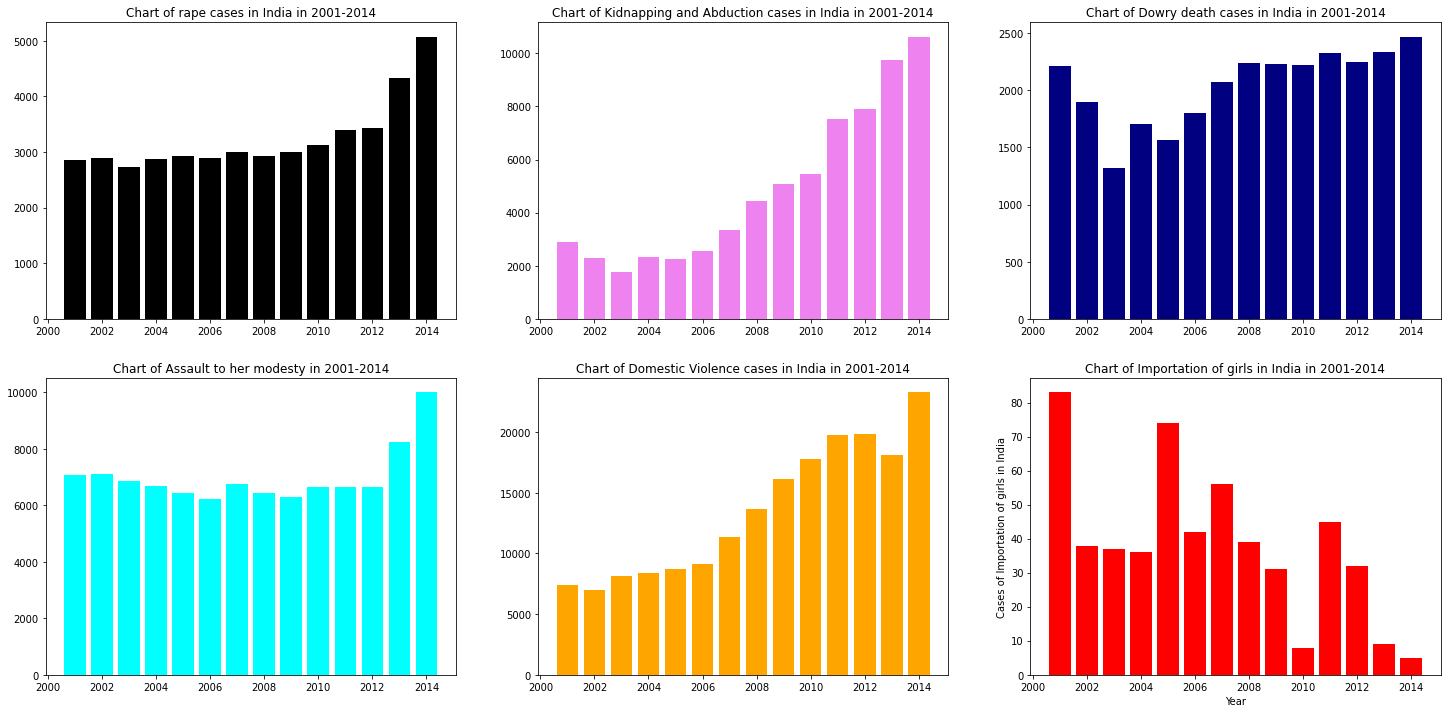

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(25, 12))

axes[0,0].set_title("Chart of rape cases in India in 2001-2014")
axes[0,0].bar(crimes_df.Year, crimes_df.Rape, color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Rape in India') #Y-axis

axes[0,1].set_title("Chart of Kidnapping and Abduction cases in India in 2001-2014")
axes[0,1].bar(crimes_df.Year, crimes_df.Kidnapping_Abduction, color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Kidnapping and Abduction in India') #Y-axis

axes[0,2].set_title("Chart of Dowry death cases in India in 2001-2014")
axes[0,2].bar(crimes_df.Year, crimes_df.Dowry_Deaths, color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Dowry deaths in India') #Y-axis

axes[1,0].set_title("Chart of Assault to her modesty in 2001-2014")
axes[1,0].bar(crimes_df.Year, crimes_df.Hurting_of_womens_modesty, color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Assaulting a women for her modesty in India') #Y-axis

axes[1,1].set_title("Chart of Domestic Violence cases in India in 2001-2014")
axes[1,1].bar(crimes_df.Year, crimes_df.Domestic_Cruelty, color = 'orange');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Domestic Violence in India') #Y-axis

axes[1,2].set_title("Chart of Importation of girls in India in 2001-2014")
axes[1,2].bar(crimes_df.Year, crimes_df.Importation_of_Girls, color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Importation of girls in India') #Y-axis

### There are two things to be concluded from the above bar chart -

####      1) The cases have incraesed over the years.

####       2) 2014 has been the year, where violance against women was reported the maximum, under each of the cases like, rape, domestic violence etc, which can also be proved below, which can also be cross examined with the code below.

In [23]:
count_df = crimes_df.groupby('Year')[['STATE/UT']].count()
count_df

STATE/UT
Year          
2001       716
2002       719
2003       728
2004       729
2005       733
2006       740
2007       743
2008       761
2009       767
2010       779
2011       791
2012       811
2013       823
2014       837

#### Let us use seaborn to take help of heatmap to represent how more cases from each state started coming up more frequently with each passing year.

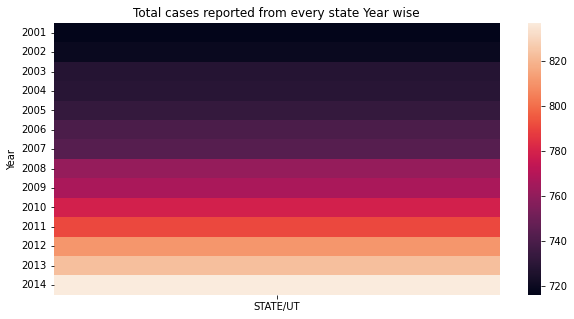

In [24]:
plt.figure(figsize=(10,5))
plt.title("Total cases reported from every state Year wise")
sns.heatmap(count_df);